<a href="https://colab.research.google.com/github/Harshaveenakondeti/python-in-google-colab/blob/main/Supermarket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket sales Analysis


# Introduction
This is a dataaset of supermarket which sells various type of product.

**Aim** : I aim to identify to analyse who are the major custumers to it.which products are seling most.how much is their gross income.In which hour sales are more from given attributes.
We have to analyse data and drawn insights from it





## dataset Description
It has 1000 rows and 17 columns, in which 8 are numerical ,7 are categorical 2 are date columns.
## Columns Description:
### Numerical columns:

* **Unit price**: Price of each product in $
* **Quantity**: Number of products purchased by customer
* **Tax**: 5% tax fee for customer buying
* **Total**: Total price including tax
* **COGS**: Cost of goods sold
* **Gross income**: Gross income
* **Gross margin percentage**: Gross margin percentage
* **Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)
### Categorical columns:
* **Invoice id**: Computer generated sales slip invoice identification number
* **Branch**: Branch of supercenter (3 branches are available identified by A, B and C).
* **City**: Location of supercenters
* **Customer type**: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* **Gender**: Gender type of customer
* **Product line**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* **Payment**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

### Date column:
* **Date**: Date of purchase (Record available from January 2019 to March 2019)
* **Time**: Purchase time (10am to 9pm)

# Purpose of project:
solve following questions
Part-1:
*  1.Is your supermarket more popular with males or females? 
*  2.What does the customer rating look like and can you also comment on its skewness? 
*  3.What can you say about the aggregate sales across the branches? 4.Which is the most popular payment method used by customers?
*  Part-2:

* 1.Does gross income affect customer ratings?
*  2.Which is the most profitable branch? 
* 3.Create a boxplot between Gender and Gross income and explain the results? 
* 4.Can you see any time trend in gross income? 
* 5.What is the spending pattern of both males and females, meaning in which category do they spend more? 
* 6.How many products are bought by customers?
*  7.Which day of the week has maximum sales?
*  8.Which hour of the day is busiest? 
* 9.Which product line should your supermarket focus on?
*  10.Which city should be chosen for expansion and what products should be focussed on?

In [ ]:
# import neccessary libraries
import pandas as pd   # for dataframe
import numpy as np  # for maths calculations
from matplotlib import pyplot as plt # visualization libraries
import seaborn as sns

# Data Collection
Data is collected from LMS.It is uploaded to Google Colab.Data is read into pandas dataframe

In [ ]:
# read data into pandas dataframe
df = pd.read_excel('supermarket_sales.xlsx')   # convert data inti dataframe

# data Exploring

Now, we will check data has imported or not by using head() function .it will give first 5 data  of rows

In [ ]:
df.head()  # read 5 rows of all columns

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


Now, we will check columns of in dataframe

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'city code ', 'Customer type', 'Gender',
       'Product code', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Lets, check shape of dataframe, how many rows and columns

In [ ]:
df.shape

(1000, 17)

So, it has 1000 rows and 17 columns, in which 8 are numerical,7 are ctaegorical,2 are data. lets check data types of columns

In [ ]:
df.info() # data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In 1000 rows, we have 4 null values in Unit price column, 7 null values in Rating column.Unit price is in Object datatype. But it should be in float datatype.time should bw converted to datetime type.payment,gender,product code,customer type,city code,branch should be converted to catogory type.

# Data cleaning

In [ ]:
for col in ['Branch','city code ','Customer type','Gender','Product code','Payment']:
  df[col]=df[col].astype('category')

here, we converted branch,city code,customer type,gender,product code,payment in to category type

In [ ]:
df['Unit price'].value_counts()

-        5
83.77    3
65.94    2
36.36    2
99.82    2
        ..
14.7     1
28.45    1
57.95    1
47.65    1
88.34    1
Name: Unit price, Length: 935, dtype: int64

here we checked unitprice column values

In [ ]:
import re  # import regex library for string manipulation

In [ ]:
df['Unit price'].unique()

array([74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56, '-', 54.84,
       14.48, 25.51, 46.95, 43.19, 71.38, 93.72, 68.93, 72.61, 54.67,
       40.3, 86.04, 87.98, 33.2, 34.56, 88.63, 52.59, 33.52, 87.67, 88.36,
       24.89, 94.13, 78.07, 83.78, 96.58, 99.42, 68.12, 62.62, 60.88,
       54.92, 30.12, 86.72, 56.11, 69.12, 98.7, 15.37, 93.96, 56.69,
       20.01, 18.93, 82.63, 91.4, 44.59, 17.87, 15.43, '$', 85.98, 44.34,
       89.6, 72.35, 30.61, 24.74, 55.73, 55.07, 15.81, 75.74, 15.87,
       33.47, 97.61, 78.77, 18.33, 89.48, 62.12, 48.52, 75.91, 74.67,
       41.65, 49.04, 78.31, 20.38, 99.19, 96.68, 19.25, 80.36, 48.91,
       83.06, 76.52, 49.38, 42.47, 76.99, 47.38, 44.86, 21.98, 64.36,
       89.75, 97.16, 87.87, 12.45, 52.75, 82.7, 48.71, 78.55, 23.07,
       58.26, 30.35, 88.67, 27.38, 62.13, 33.98, 81.97, 16.49, 98.21,
       72.84, 58.07, 80.79, 27.02, 21.94, 51.36, 10.96, 53.44, 99.56,
       57.12, 99.96, 63.91, 56.47, 93.69, 32.25, 31.73, 68.54, 90.28,
       39

through unique values, we can see there are special charecters present in column, that is the reason its data type is object

In [ ]:
df['Unit price']=df['Unit price'].replace(['-','$','o','nan'],'NaN')

replaced special charecters with Nan 

In [ ]:
df=df.dropna()  # drop null values containg Nan

In [ ]:
df['Unit price']=df['Unit price'].astype(float)

converted unit price column to float

In [ ]:
df['Invoice ID']=df['Invoice ID'].astype('category')
df['Invoice ID'].head()

0    750-67-8428
1    226-31-3081
2    631-41-3108
3    123-19-1176
4    373-73-7910
Name: Invoice ID, dtype: category
Categories (989, object): ['101-17-6199', '101-81-4070', '102-06-2002', '102-77-2261', ...,
                           '895-03-6665', '895-66-0685', '896-34-0956', '898-04-2717']

converted invoice id colum o category,because his is not numerical, no order in it.

In [ ]:
import datetime

datetime library imported to change date,time columns

In [ ]:
df['Time']=pd.to_datetime(df['Time'], format='%H:%M:%S')

time colum converted to datetime format as hours,minutes,seconds

In [ ]:
df['Time'].head()

0   1900-01-01 13:08:00
1   1900-01-01 10:29:00
2   1900-01-01 13:23:00
3   1900-01-01 20:33:00
4   1900-01-01 10:37:00
Name: Time, dtype: datetime64[ns]

check if converted or not,here defaut it takes date as 1900-01-01, we dont need this, we have original date column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               989 non-null    category      
 1   Branch                   989 non-null    category      
 2   city code                989 non-null    category      
 3   Customer type            989 non-null    category      
 4   Gender                   989 non-null    category      
 5   Product code             989 non-null    category      
 6   Unit price               981 non-null    float64       
 7   Quantity                 989 non-null    int64         
 8   Tax 5%                   989 non-null    float64       
 9   Total                    989 non-null    float64       
 10  Date                     989 non-null    datetime64[ns]
 11  Time                     989 non-null    datetime64[ns]
 12  Payment                  989 non-nul

checked all column with its data types, null values,how many rows

In [ ]:
df['hour']=df['Time'].dt.hour
df['hour'].head()

0    13
1    10
2    13
3    20
4    10
Name: hour, dtype: int64

created hour column from time column, because we have to deal with hour only for trend relation.

In [ ]:
df.hour.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: hour, Length: 989, dtype: bool

In [ ]:
df['day']=df['Date'].dt.day
df['day'].head()

0     5
1     8
2     3
3    27
4     8
Name: day, dtype: int64

created new day column

In [ ]:
df['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

checking values of date column

In [ ]:
from datetime import date
import calendar
df['week']=df['Date'].dt.day_name()
df['week'].head()

0    Saturday
1      Friday
2      Sunday
3      Sunday
4      Friday
Name: week, dtype: object

we imported date library from date time.we created new column of week for week of the day from date column

In [ ]:
df.dropna(axis=0)

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,hour,day,week
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,5,Saturday
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,8,Friday
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,3,Sunday
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,27,Sunday
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,8,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,CT3,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13,29,Tuesday
996,303-96-2227,B,CT9,Normal,Female,PD3,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17,2,Saturday
997,727-02-1313,A,CT1,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,31.84,4.761905,1.5920,7.7,13,9,Saturday
998,347-56-2442,A,CT1,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,65.82,4.761905,3.2910,4.1,15,22,Friday


finally check null values & dropping null values will not effect data much.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               989 non-null    category      
 1   Branch                   989 non-null    category      
 2   city code                989 non-null    category      
 3   Customer type            989 non-null    category      
 4   Gender                   989 non-null    category      
 5   Product code             989 non-null    category      
 6   Unit price               981 non-null    float64       
 7   Quantity                 989 non-null    int64         
 8   Tax 5%                   989 non-null    float64       
 9   Total                    989 non-null    float64       
 10  Date                     989 non-null    datetime64[ns]
 11  Time                     989 non-null    datetime64[ns]
 12  Payment                  989 non-nul

finally check again all column data types,null values

In [ ]:
sales= df.drop(columns={'Time','day','Invoice ID','Tax 5%',})
sales.head()

,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,hour,week
0,A,CT1,Member,Female,PD1,74.69,7,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13,Saturday
1,C,CT3,Normal,Female,PD2,15.28,5,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10,Friday
2,A,CT1,Normal,Male,PD3,46.33,7,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13,Sunday
3,A,CT1,Member,Male,PD1,58.22,8,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20,Sunday
4,A,CT1,Normal,Male,PD4,86.31,7,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10,Friday


created new data frame called sales by dropping unneccasary columns such as time,day,invoice id, tax 5%.By dropping some columns will not effect dataset.


In [ ]:
sales.shape

(989, 16)

checking of new dataframe sales rows and columns

In [ ]:
sales['Unit price'].shape

(989,)

Data cleaning part finished, now data is clean and ready for analysis

# Data Analysis

# Part 1:
## 1.Is your supermarket more popular with males or females?

In [ ]:
sales.Gender.value_counts()  # it gives count of each  category

Female    497
Male      492
Name: Gender, dtype: int64

We have 497 females and 492 Males.So,Supermarket is popular with females than males.

## 2.What does the customer rating look like and can you also comment on its skewness?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


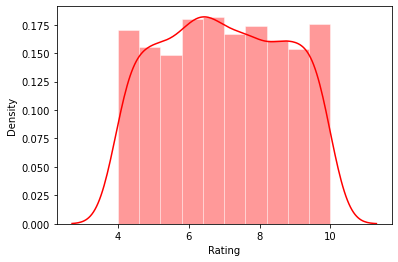

In [ ]:
sns.distplot(a=sales.Rating, color='red',
             hist_kws={"edgecolor": 'white'})  # it will show skewness,in histogram

Rating frequency is more between 5 and 6.It is symmetric based on skewness 

## 3.What can you say about the aggregate sales across the branches?

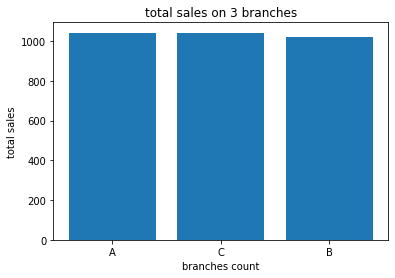

In [ ]:
# Creating plot
#fig = plt.figure(figsize=(5,5))
plt.bar(sales['Branch'],sales['Total']) # plotting branch n sales
plt.title("total sales on 3 branches")
plt.xlabel("branches count")
plt.ylabel("total sales")
# show plot
plt.show()

Branch B has less total sales than other branches A and C.

##4.Which is the most popular payment method used by customers?

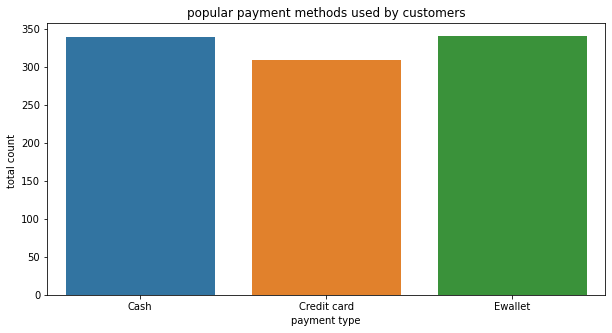

In [ ]:
#fig for payment countplot for maximun custumers usiing which type of payment
plt.figure(figsize=(10,5)) # for size of plot
sns.countplot(x=sales['Payment'], data=sales) # x axis is am column.
plt.title('popular payment methods used by customers')
plt.xlabel('payment type')  # x -axis name
plt.ylabel('total count ')
plt.show()

Credit card has less count than cash. cash is almost similar to Ewallet.So Ewallet and Cash are wo 2 popular methods used by customers.

#Part-2:

## 1.Does gross income affect customer ratings?

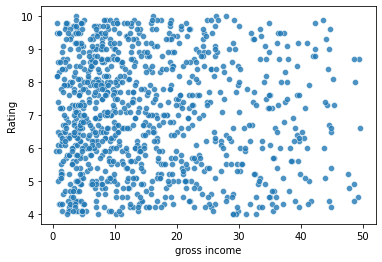

In [ ]:
# income vs rating
sns.scatterplot(x = "gross income", y = "Rating",  alpha=.8, data = sales) # to see relation between gross income and rating
  
# To show the plot
plt.show()

Here, it is not showing relation between gross income & rating.

## 2.Which is the most profitable branch?

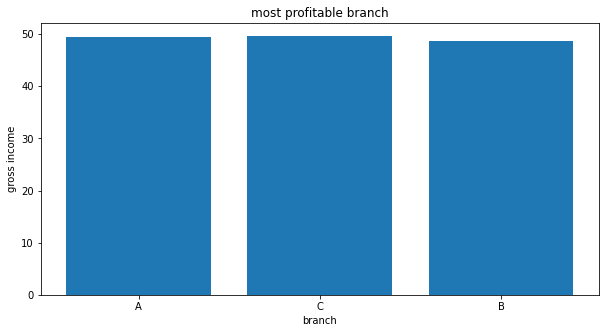

In [ ]:
# profitable branch on bases of gross income of that branch by  bar plot
fig = plt.figure(figsize=(10,5))  # for size
plt.bar(sales['Branch'], sales['gross income']) # comparing branch category with gross income of that branch
plt.title("most profitable branch")
plt.xlabel("branch")
plt.ylabel("gross income")
# show plot
plt.show()

A and C are more profitable than B Branch

## 3.Create a boxplot between Gender and Gross income and explain the results?

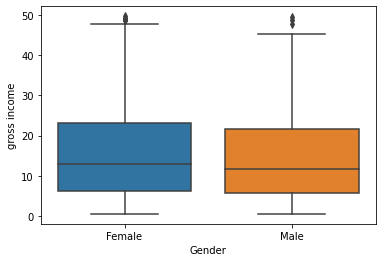

In [ ]:
# 2 boxplots for gross income with male and female
sns.boxplot(x='Gender',y='gross income',data=sales)

here, when we observe female and male median values in box plots. female have slight higher valve.so because of females there is high gross income for supermarket comparing o males.Here outliers also present in both males and females data.

## 4.Can you see any time trend in gross income?

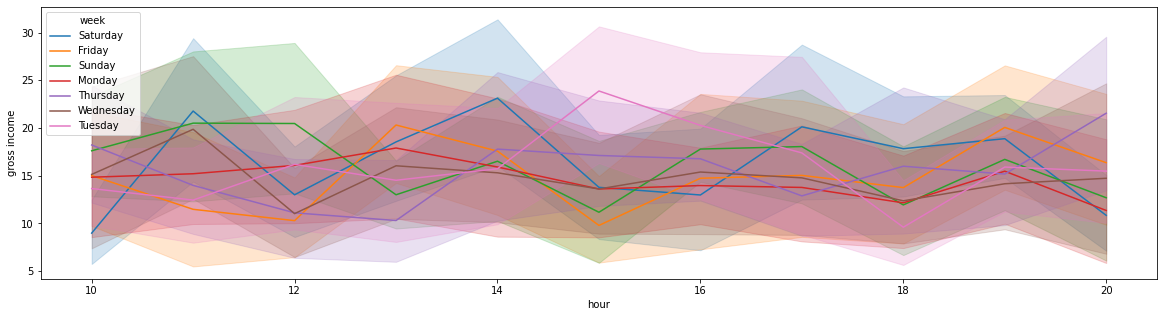

In [ ]:
# line plot for time trend vs gross income
plt.figure(figsize=(20,5))  # for bigger size
sns.lineplot( x= "hour",
             y = "gross income",hue="week",
             data = sales)  #  we are checking relation for which time of day gross income is more

From above graph, we can see relation between gross income in which hour for all days of week.
1. Pink line means Tuesday shows high vale of 25 between 14 and 16 hours of that day. so on tuesday 14:00PM to 16:00 PM their gross income is more.
2. gross income is less for:
* Friday at 12:00 Pm and 15:00 PM
* Thursday at 13:00 PM 
* Sunday at 13:00 PM ,15:00 PM and 18:00 PM
* Mondat at 18:00 PM
* Thursday at 13:00 PM
* wednesday at 12:00 Pm
* Tuesday at 18:00 PM



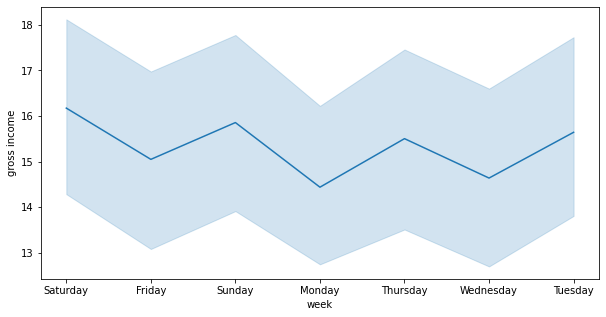

In [ ]:
plt.figure(figsize=(10,5))  # for bigger size
sns.lineplot( x = "week",
             y = "gross income",
             data = sales)  # we are checking for which day of week ,gross income is more

when we notice relation between days of week and gross income. here, saturday,sunday,thursday,tuesday have high gross income.SO in this days, we can make sure no employee take OFF to maintain gross income.

##5. What is the spending pattern of both males and females, meaning in which category do they spend more?

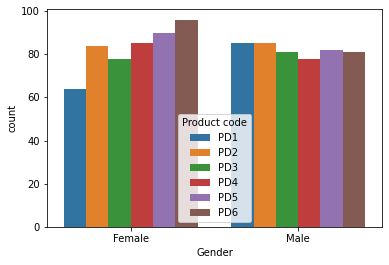

In [ ]:
sns.countplot(x='Gender',hue='Product code',data=sales) # for which gender ,which product code they buy 

* PD1 male is buying more than female
* PD2 male and females are buying equal amounts
* PD3 male is buying more than female
* PD4 female is buying more than male
* PD5 Female is buying more than male
* PD6 Female is buying more than male

|Product line | product code|
|---|---|
|Health & beauty| PD1
|Electronic accesories| PD2
|Home & lifestyle | PD3
|Sports and travel | PD4
|Food & beverages|PD5
|fashion accesories|PD6

*  ** Finally, we can say, Females buys PD4,PD5,PD6 more and Males buys PD1,PD3 more , and PD2 is consumed by both equally.**

## 6.How many products are bought by customers?

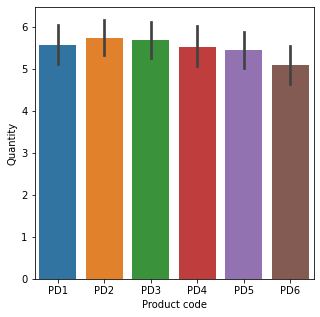

In [ ]:
plt.figure(figsize=(5,5))  # for size
sns.barplot(x='Product code',y='Quantity',data=sales)  # how many products based on quantity of that product

here, PD2 and PD3 are highly sold based on Quantities sold of that product

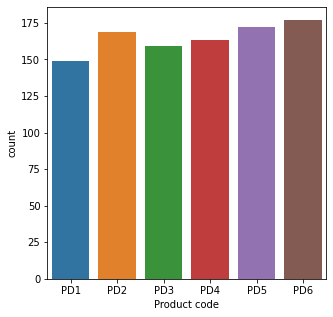

In [ ]:
plt.figure(figsize=(5,5))  # size
sns.countplot(x='Product code',data=sales) # how many products per each

here, PD6 has highest count with 175. so PD6 is highly used by customers. and PD1 with 150 are lessly used by customers.

## 7.Which day of the week has maximum sales?

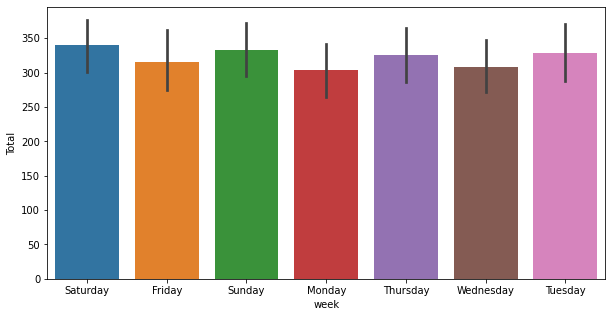

In [ ]:
plt.figure(figsize=(10,5))  # for size
sns.barplot(x='week',y='Total',data=sales)  # relation between week of day and total

saturday,sunday,thursday,tuesday have maximun salesthan other weekdays.Saturday has more sales than other.

## 8.Which hour of the day is busiest? 

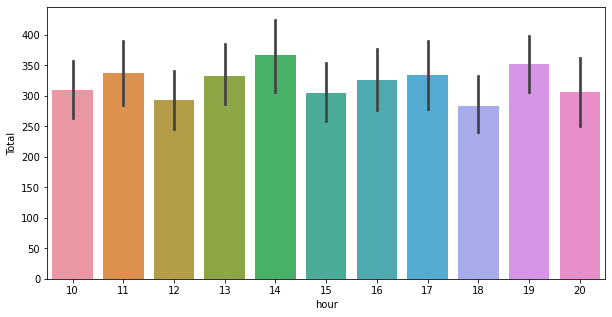

In [ ]:
# Buisiest means high sales
plt.figure(figsize=(10,5))  # for size
sns.barplot(x='hour',y='Total',data=sales)  # relation between hour of day and total sales(hey will be busy)

At 14:00 PM, it has high sales, so this is the busiest time, after that 19:00 PM is busy time of the day.

## 9.Which product line should your supermarket focus on? 

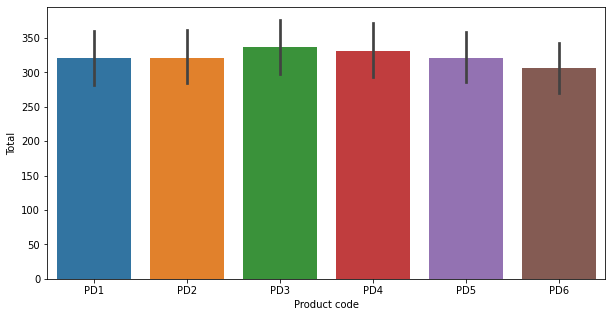

In [ ]:
# check product code with sales
plt.figure(figsize=(10,5))  # for size
sns.barplot(x='Product code',y='Total',data=sales)  # to find which have low sales, we will concentrate on that

PD6 has low total sales, so , we have to concentrate more on product code PD6.

## 10.Which city should be chosen for expansion and what products should be focussed on?
Here, we have to check relation between city,product code

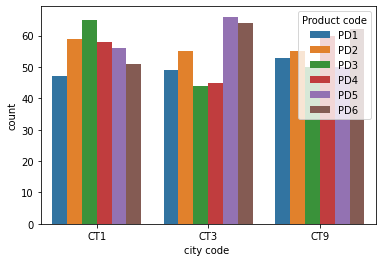

In [ ]:
# for which city code, how many product codes are selling and o which we can concentrate more
sns.countplot(x='city code ',hue='Product code',data=sales)

* CT1: PD1 is selling less, so we have to concentrate more on PD1
* CT3: PD3 is selling less, so we have to concentrate more on PD3
* CT9: PD3,PD5 are selling less, so we have to concentrate more on that. 

|City|city code|
|---|---|
CT1| Yangon|
CT3| Naypyitaw|
CT9| Mandaley|

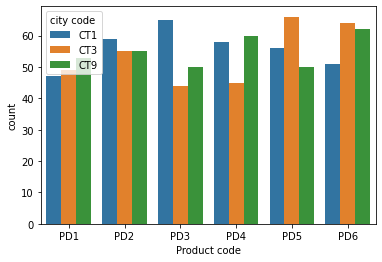

In [ ]:
# for which product code, in which city code are selling more and so we can expand it
sns.countplot(hue='city code ',x='Product code',data=sales)

CT1 and CT3 are selling more for PD3 and PD5,CT3 is selling more for PD6 also.so CT3 is selling 2 products more, so we can expand in CD3. 

# Conclusion:
we can expand supermarket in CT3(naypyitaw) city, because here sales are more.we have to concentrate on PD1(Health & beauty),PD3(Home & lifestyle),PD5(food & beverages) product codes.At 14:00 Pm we are having more sales.Females are more frequently coming to supermarkets.Branch B is having less sales, so we need to concentrate on more.On Tuesday we are having high gross income.

# created by
---------
|Author |Harsha Veena|
----|----|
|Created on |18:4:2022|
|On| Google Colab|
| modified|14:5:2022|